In [1]:
#  the libraries
import tensorflow as tf
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt
import random
import pandas as pd
from sklearn.model_selection import train_test_split 


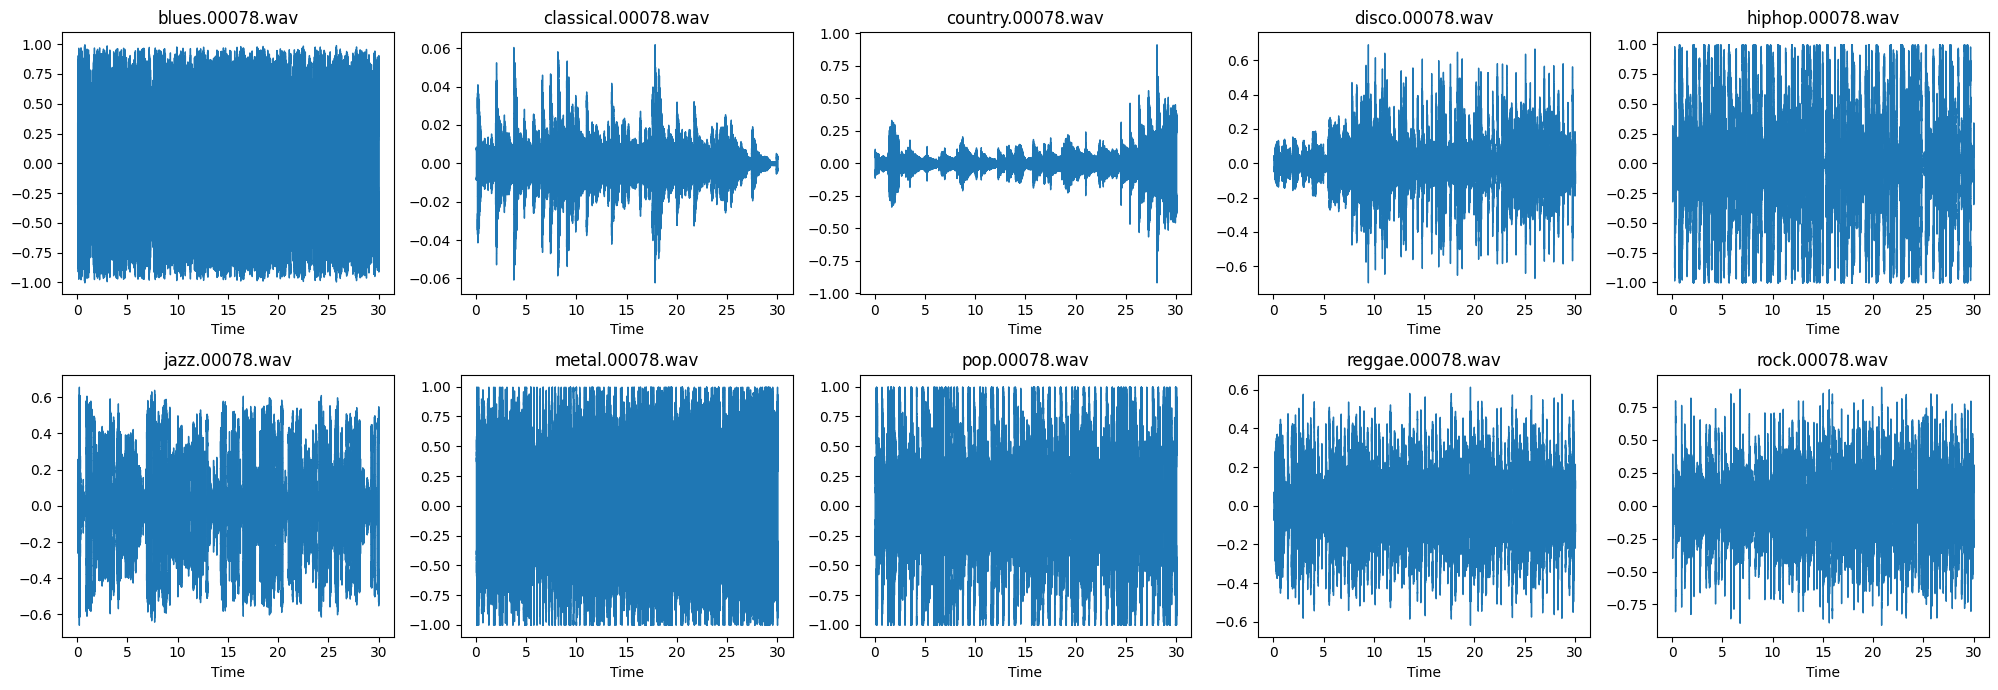

In [94]:
fig = plt.figure(figsize=(20, 7)) 
rows = 2
columns = 5
random_choice = random.randint(a=0, b=99)

for i, class_i in enumerate(os.listdir("./data/genres_original/")): 
    audio_choice = os.listdir(f'./data/genres_original/{class_i}/')[random_choice]
    audio, sr = librosa.load(path=os.path.join(f'./data/genres_original/{class_i}/', audio_choice))
    
    ax = fig.add_subplot(rows, columns, i + 1)
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.axis() 
    ax.set_title(f'{audio_choice}')

plt.tight_layout()
plt.show()

In [85]:
def check_total_wav(base_dir): 
    genres  = os.listdir(base_dir)
    iter = 0
    for genre in range(len(genres)): 
        for file in os.listdir((os.path.join(base_dir, genres[genre]))): 
            iter += 1
        print(f'total genre {genres[genre]} is :  {iter}')
        iter = 0
check_total_wav('./data/genres_original/')

total genre blues is :  99
total genre classical is :  99
total genre country is :  99
total genre disco is :  99
total genre hiphop is :  99
total genre jazz is :  99
total genre metal is :  99
total genre pop is :  99
total genre reggae is :  99
total genre rock is :  99


In [86]:
def random_check_result_dimension():
    random = "./data/genres_original/blues/blues.00000.wav"
    audio, sr  = librosa.load(random)
                    # chroma features
    array_cft = librosa.feature.chroma_stft(y=audio, sr=sr)
    array_zero_crossing_rate = librosa.feature.zero_crossing_rate(y  = audio )
    arrray_rms = librosa.feature.rms(y = audio)
    array_spectiaL_centroid = librosa.feature.spectral_centroid(y = audio)
    array_mfcc = librosa.feature.melspectrogram(y = audio, sr = sr)
    print(np.array(array_cft).shape)
    print(np.array(array_zero_crossing_rate).shape)
    print(np.array(arrray_rms).shape)
    print(np.array(array_spectiaL_centroid).shape)
    print(np.array(array_mfcc).shape)

random_check_result_dimension()

(12, 1293)
(1, 1293)
(1, 1293)
(1, 1293)
(128, 1293)


In [106]:
def get_value(array : np.array, action):
    array_flat = array.flatten()
    if action == "avg": 
        return np.mean(array_flat)
    elif action  == "sum": 
        return np.sum(array_flat)
    else:
        raise get_value("please check again your action")

# the dataset is available on : https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/data
def standart_scaler(data, columns):
    for column in columns: 
        mean = np.mean(np.array(data[column]))
        standart_deviasion = np.std(np.array(data[column]))
        if mean > 1:
            for row in range(data.shape[0]):
                #  just get two digits number after "."
                data.at[row, column] = np.round((data.loc[row, column]  -  mean) / standart_deviasion,  decimals = 5)
        else: 
            # print(f'masuk ke  : {column}')
            for row in range(data.shape[0]): 
                # print(f'ubah : {np.round(data.loc[row, column], decimals= 2)}')
                data.at[row, column] =  np.round(data.loc[row, column], decimals= 5)
    return data

#  function for convert to excel 
def convert_excel(data_extraction: dict): 
    df = pd.DataFrame(data_extraction)
    # df = standart_scaler(df, )
    df.to_excel("./data/extract_data/feature_extraction.xlsx")
#  succed

def low_feature_extract(base_dir): 
    # series_music = []
    labels = []
    iter_label = 0
    dict_features_extraction = {}
    # define array for feature extraction
    array_avg_spectral_bandwidth = []
    array_avg_zero_crossing_rate = []
    arrray_avg_rms = []
    array_avg_spectiaL_centroid = []
    array_avg_spectiaL_bandwith = []
    array_avg_spectral_rolloff = []
    array_avg_spectral_flattness = []

    # sum array
    array_sum_spectral_bandwidth = []
    array_sum_zero_crossing_rate = []
    arrray_sum_rms = []
    array_sum_spectiaL_centroid = []
    array_sum_spectiaL_bandwith = []
    array_sum_spectral_rolloff = []
    array_sum_spectral_flattness = []

    array_wav  = []
    # the genres
    genres = os.listdir(base_dir)
    for genre in genres: 
        genre_path = os.path.join(base_dir, genre)
        # temp_series = []  
        for music in os.listdir(genre_path):
            try: 
                array_wav.append(music)
                audio, sr  = librosa.load(os.path.join(genre_path, music))
                # chroma features
                array_avg_spectral_bandwidth.append(get_value(librosa.feature.spectral_bandwidth(y=audio, sr=sr), action="avg"))
                # zero crossing rate
                array_avg_zero_crossing_rate.append(get_value(librosa.feature.zero_crossing_rate(y  = audio), action="avg"))
                # rms
                arrray_avg_rms.append(get_value(librosa.feature.rms(y = audio), action="avg")) 
                # spectral centroid
                array_avg_spectiaL_centroid.append(get_value(librosa.feature.spectral_centroid(y = audio), action="avg"))
                # spectral bandwith
                array_avg_spectiaL_bandwith.append(get_value(librosa.feature.spectral_bandwidth(y = audio, sr = sr), action="avg"))
                # spectral roll off
                array_avg_spectral_rolloff.append(get_value(librosa.feature.spectral_rolloff(y = audio, sr = sr), action="avg"))
                # speectral flattness
                array_avg_spectral_flattness.append(get_value(librosa.feature.spectral_flatness(y = audio), action="avg"))
                # for labels
                # adding another method



                # sum
                array_sum_spectral_bandwidth.append(get_value(librosa.feature.spectral_bandwidth(y=audio, sr=sr), action="sum"))
                # zero crossing rate
                array_sum_zero_crossing_rate.append(get_value(librosa.feature.zero_crossing_rate(y  = audio), action="sum"))
                # rms
                arrray_sum_rms.append(get_value(librosa.feature.rms(y = audio), action="sum")) 
                # spectral centroid
                array_sum_spectiaL_centroid.append(get_value(librosa.feature.spectral_centroid(y = audio), action="sum"))
                # spectral bandwith
                array_sum_spectiaL_bandwith.append(get_value(librosa.feature.spectral_bandwidth(y = audio, sr = sr), action="sum"))
                # spectral roll off
                array_sum_spectral_rolloff.append(get_value(librosa.feature.spectral_rolloff(y = audio, sr = sr), action="sum"))
                # speectral flattness
                array_sum_spectral_flattness.append(get_value(librosa.feature.spectral_flatness(y = audio), action="sum"))

                # labels
                labels.append(iter_label)
            except Exception as e: 
                # if audio data can't load
                print(f'{os.path.join(genre_path, music)}: {e}')
        # series_music.append(temp_series)
        iter_label += 1
    
    dict_features_extraction = {
        "wav" : array_wav, 
        "avg spactial bandwith" : array_avg_spectral_bandwidth, 
        "avg zero crossing rate" : array_avg_zero_crossing_rate,
        "avg rms" : arrray_avg_rms, 
        "avg spactial centroid" : array_avg_spectiaL_centroid,
        "avg spectral flattness" : array_avg_spectral_flattness, 
        "avg spectrall rolloff" : array_avg_spectral_rolloff, 
        # sum
        "sum spactial bandwith" : array_sum_spectral_bandwidth, 
        "sum zero crossing rate" : array_sum_zero_crossing_rate,
        "sum rms" : arrray_sum_rms, 
        "sum spactial centroid" : array_sum_spectiaL_centroid,
        "sum spectral flattness" : array_sum_spectral_flattness, 
        "sum spectrall rolloff" : array_sum_spectral_rolloff, 
        # labels
        "label" : labels
    }
    
    convert_excel(dict_features_extraction)
    # return the values
    print(f'finish convert to excel, please check to ./data/extract_data/feature_extraction.xlsx')

# load data that has been doing extraction 
def load_feature_extraction_data(data_path : str):
    # convert to excel 
    return pd.read_excel(data_path, index_col=0 ) 

# load data that has been doing extraction 
def get_train_test_data(df : pd.DataFrame): 
    features = df[df.columns[1:len(df.columns) - 1]]
    target = df[df.columns[-1]]
    x_train, y_train, x_test, y_test = train_test_split(features, target, random_state= 42, test_size=0.4)
    return x_train, y_train, x_test, y_test 

#  def norm_data()

def create_model_and_fit(x_train, y_train, x_test, y_test):
    # next : define callbacks
    class CustomCallbacks(tf.keras.callbacks.Callback): 
        def on_epochs_end(self, logs = {}): 
            if self.logs("accuracy") > 0.96: 
                self.stop_train = True

    callbacks = CustomCallbacks()
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 512, activation = 'relu',  input_shape = (12,) ), 
        tf.keras.layers.Dense(units = 128, activation = 'relu'), 
        # tf.keras.layers.Dropout(rate = 0.2), 
        # tf.keras.layers.Dense(units = 16, activation = 'relu'), 
        tf.keras.layers.Dense(units = 10, activation = 'softmax'), 


    ])
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = "adam", metrics = ['accuracy'])
    history = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test,  y_test),   callbacks = callbacks)
    return model, history 


In [88]:
low_feature_extract("./data/genres_original/")
data_train = load_feature_extraction_data("./data/extract_data/feature_extraction.xlsx")
data_train.head()

finish convert to excel, please check to ./data/extract_data/feature_extraction.xlsx


,wav,avg spactial bandwith,avg zero crossing rate,avg rms,avg spactial centroid,avg spectral flattness,avg spectrall rolloff,sum spactial bandwith,sum zero crossing rate,sum rms,sum spactial centroid,sum spectral flattness,sum spectrall rolloff,label
0,blues.00000.wav,2002.412407,0.083045,0.130184,1784.122641,0.004496,3805.723030,2.589119e+06,107.376953,168.328339,2.306871e+06,5.812777,4.920800e+06,0
1,blues.00001.wav,2038.987608,0.056040,0.095908,1530.261767,0.002298,3550.713616,2.636411e+06,72.459473,124.008812,1.978628e+06,2.971441,4.591073e+06,0
2,blues.00002.wav,1747.754087,0.076291,0.175473,1552.832481,0.002635,3042.410115,2.259846e+06,98.644531,226.886871,2.007812e+06,3.407076,3.933836e+06,0
3,blues.00003.wav,1596.422564,0.033309,0.141040,1070.153418,0.000955,2184.879029,2.064174e+06,43.068359,182.365067,1.383708e+06,1.234673,2.825049e+06,0
4,blues.00004.wav,1748.410758,0.101461,0.091501,1835.128513,0.003240,3579.957471,2.260695e+06,131.188477,118.311081,2.372821e+06,4.189601,4.628885e+06,0


In [89]:
df = load_feature_extraction_data("./data/extract_data/feature_extraction.xlsx")
df.head()

,wav,avg spactial bandwith,avg zero crossing rate,avg rms,avg spactial centroid,avg spectral flattness,avg spectrall rolloff,sum spactial bandwith,sum zero crossing rate,sum rms,sum spactial centroid,sum spectral flattness,sum spectrall rolloff,label
0,blues.00000.wav,2002.412407,0.083045,0.130184,1784.122641,0.004496,3805.723030,2.589119e+06,107.376953,168.328339,2.306871e+06,5.812777,4.920800e+06,0
1,blues.00001.wav,2038.987608,0.056040,0.095908,1530.261767,0.002298,3550.713616,2.636411e+06,72.459473,124.008812,1.978628e+06,2.971441,4.591073e+06,0
2,blues.00002.wav,1747.754087,0.076291,0.175473,1552.832481,0.002635,3042.410115,2.259846e+06,98.644531,226.886871,2.007812e+06,3.407076,3.933836e+06,0
3,blues.00003.wav,1596.422564,0.033309,0.141040,1070.153418,0.000955,2184.879029,2.064174e+06,43.068359,182.365067,1.383708e+06,1.234673,2.825049e+06,0
4,blues.00004.wav,1748.410758,0.101461,0.091501,1835.128513,0.003240,3579.957471,2.260695e+06,131.188477,118.311081,2.372821e+06,4.189601,4.628885e+06,0


In [90]:
# columns = df.columns
df = standart_scaler(df, [str(x) for x in df.columns[1 : -1]])
df.head()

,wav,avg spactial bandwith,avg zero crossing rate,avg rms,avg spactial centroid,avg spectral flattness,avg spectrall rolloff,sum spactial bandwith,sum zero crossing rate,sum rms,sum spactial centroid,sum spectral flattness,sum spectrall rolloff,label
0,blues.00000.wav,-0.45281,0.08304,0.13018,-0.57998,0.00450,-0.48321,-0.45435,-0.48981,-0.00919,-0.58096,-0.58907,-0.48429,0
1,blues.00001.wav,-0.38322,0.05604,0.09591,-0.93469,0.00230,-0.64534,-0.38487,-1.13481,-0.53118,-0.93524,-0.66498,-0.64624,0
2,blues.00002.wav,-0.93735,0.07629,0.17547,-0.90315,0.00264,-0.96849,-0.93808,-0.65111,0.68050,-0.90374,-0.65334,-0.96905,0
3,blues.00003.wav,-1.22529,0.03331,0.14104,-1.57757,0.00095,-1.51367,-1.22555,-1.67773,0.15613,-1.57733,-0.71138,-1.51365,0
4,blues.00004.wav,-0.93610,0.10146,0.09150,-0.50871,0.00324,-0.62675,-0.93684,-0.04995,-0.59828,-0.50978,-0.63244,-0.62767,0


In [107]:
x_train, x_test,  y_train,y_test  = get_train_test_data(df)

In [108]:
model, history  = create_model_and_fit(x_train, y_train, x_test, y_test )

Epoch 1/500


c:\Users\Teddy Dharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2227 - loss: 2.1597 - val_accuracy: 0.2980 - val_loss: 1.9763
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3354 - loss: 1.8381 - val_accuracy: 0.3207 - val_loss: 1.8353
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4214 - loss: 1.6371 - val_accuracy: 0.3485 - val_loss: 1.7696
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4503 - loss: 1.5287 - val_accuracy: 0.3636 - val_loss: 1.7580
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4531 - loss: 1.5172 - val_accuracy: 0.3788 - val_loss: 1.7119
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5114 - loss: 1.4696 - val_accuracy: 0.3939 - val_loss: 1.6825
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4288 - loss: 1.5147 - val_accuracy: 0.3813 - val_loss: 1.6951
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4713 - loss: 1.4752 - val_accuracy: 0.3939 - val_loss: 1.

In [ ]:
# creating pretrained model using efficient net
random_var = random.randint(1, 700)
pred_data = df.iloc[random_var, 1:len(df.columns) - 1].to_numpy().astype(np.float32)

pred_data = np.expand_dims(pred_data, axis= 0)
print(f'prediction : {np.argmax(model.predict(pred_data))}')
print(f'actual : {df.iloc[random_var, -1]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
prediction : 1
actual : 1


for high level architecture

In [66]:

def high_level_feature_extraction(): 
    classes = os.listdir("./data/genres_original/")

    for i in classes: 
        if not os.path.exists(f'./data/melspectogram/{i}'): 
            os.mkdir(f'./data/melspectogram/{i}')

    for class_i  in  classes:
        full_path_load = f"./data/genres_original/{class_i}/"
        for wav in os.listdir(full_path_load): 
            wav_load, sr = librosa.load(os.path.join(full_path_load, wav))
            mel_spectogram = librosa.feature.melspectrogram(y=wav_load, sr=sr, n_mels=128,
                                    fmax=8000)
            fig, ax = plt.subplots(facecolor='none')
            img = librosa.display.specshow(mel_spectogram, sr = sr)
            plt.savefig(f'./data/melspectogram/{class_i}/{wav}_spectogram.png')
            # save the result to image data
            plt.close()

# function for getttig the tensor  dataset from image
def get_train_test_from_image(dir): 
    data = tf.keras.preprocessing.image_dataset_from_directory(
        dir,
        labels='inferred',
        label_mode='int',
        shuffle = True,
        color_mode='rgb',
        batch_size= None, 
        image_size=(160, 160),
    ) 
    train_files_length  = int(0.7 * len(data))
    train_data = data.take(train_files_length)

    normalized_layer = tf.keras.layers.Rescaling(1./255)
    test_data = data.skip(train_files_length)
    train_data_norm = train_data.map(lambda x, y: (normalized_layer(x), y)).batch(64)
    test_data_norm = test_data.map(lambda x, y: (normalized_layer(x), y)).batch(64)

    return train_data_norm, test_data_norm

def load_and_train_pretrain_model(): 
    train_data, test_data = get_train_test_from_image("./data/melspectogram/")
    inputs = tf.keras.Input(shape=(160, 160, 3))
    model = tf.keras.applications.MobileNetV2(input_shape = (160, 160, 3), include_top=False, weights='imagenet')(inputs)
    model.trainable = False
    model = tf.keras.layers.GlobalAveragePooling2D()(model)
    output = tf.keras.layers.Dense(10, activation='softmax')(model)
    final_model = tf.keras.Model(inputs, output)
    # final_model.summary()
    final_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'], optimizer = "adam")
    final_model.fit(train_data, epochs = 20, validation_data = test_data)


In [ ]:
high_level_feature_extraction()

In [67]:
load_and_train_pretrain_model()

Found 990 files belonging to 10 classes.
Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.2355 - loss: 2.2264 - val_accuracy: 0.1212 - val_loss: 3.8954
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.4297 - loss: 1.5532 - val_accuracy: 0.0976 - val_loss: 4.9280
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5464 - loss: 1.2970 - val_accuracy: 0.1145 - val_loss: 6.0332
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7065 - loss: 0.8942 - val_accuracy: 0.0943 - val_loss: 7.6600
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7458 - loss: 0.7360 - val_accuracy: 0.1010 - val_loss: 12.9397
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7696 - loss: 0.6765 - val_accuracy: 0.0909 - val_loss: 12.5713
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8526 - loss: 0.4787 - val_accuracy: 0.1145 - val_loss: 9.1185
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.8559 - loss